<span style="color:	#5642C5; font-size:30px">**<u>Data Loading and Pre-processing</u>**</span>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sentiment-prediction-on-movie-reviews/movies.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/sample.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/test.csv


In [2]:
movies=pd.read_csv("/kaggle/input/sentiment-prediction-on-movie-reviews/movies.csv")
train=pd.read_csv("/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv")
test=pd.read_csv("/kaggle/input/sentiment-prediction-on-movie-reviews/test.csv")
sample=pd.read_csv("/kaggle/input/sentiment-prediction-on-movie-reviews/sample.csv")

# Data Overview

In [3]:
# Print the shape of each DataFrame
print("movies shape:", movies.shape)
print("train shape:", train.shape)
print("test shape:", test.shape)
print("sample shape:", sample.shape)


movies shape: (143258, 14)
train shape: (162758, 5)
test shape: (55315, 4)
sample shape: (55315, 2)


In [4]:
train.head()

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment
0,marvelous_pirate,Benjamin Henry,False,Henry Selick’s first movie since 2009’s Corali...,POSITIVE
1,tony_montana_frodo_baggins_v_rocky_balboa,Felicia Lopez,False,With a cast that reads like the Vogue Oscar pa...,NEGATIVE
2,darth_vader_katniss_everdeen_sorcerer_donnie_d...,Mr. Charles Burgess,True,Creed II does not give us anything but another...,POSITIVE
3,lara_croft_glimmer,Ryan Barrett,False,"I know what you're thinking, but this is no Li...",POSITIVE
4,jason_bourne_surreal_the_terminator_indiana_jones,Alexander Glover,False,Director Fernando Meirelles tells the story wi...,POSITIVE


In [5]:
test.head()

,movieid,reviewerName,isTopCritic,reviewText
0,legend_marty_mcfly_oracle,John Kim,False,Green slowly cranks up the dread with style an...
1,terminator_katniss_everdeen_glimmer,Brian Chaney,False,Philip Noyce's direction is elegant and unforc...
2,james_bond_labyrinth_gollum,Danielle Parker,False,It wouldn't do to say what path Maria ultimate...
3,v_quest_han_solo_wondrous,Brittany Lane,False,Pig is not exactly the arthouse John Wick that...
4,enigma_hulk_surreal_starlight,Justin Willis,False,An imaginative no-budget musical of sorts abou...


In [6]:
train['sentiment'].value_counts()

POSITIVE    108761
NEGATIVE     53997
Name: sentiment, dtype: int64

# Checking Null values

In [7]:
#find the null values in train and test dataframes
train.isna().sum()

movieid                  0
reviewerName             0
isFrequentReviewer       0
reviewText            6447
sentiment                0
dtype: int64

In [8]:
test.isna().sum()

movieid            0
reviewerName       0
isTopCritic        0
reviewText      2510
dtype: int64

# Replaced Null Value with empty string

In [9]:
# Fill null 'reviewText' values with an empty string in train and test dataframe
train['reviewText'].fillna('', inplace=True)
test['reviewText'].fillna('', inplace=True)

# Movies Data Overview & Preprocessing

In [10]:
movies.head()

,movieid,title,audienceScore,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType
0,han_solo_heroic_myth_wonder_woman,Han Solo Heroic Myth Wonder Woman,50.0,NaN,NaN,NaN,2018-08-25,75.0,"Comedy, Horror, Sci-fi",English,Claude Nicolet,NaN,NaN,NaN
1,voyage_tyler_durden_han_solo_stardust,Voyage Tyler Durden Han Solo Stardust,NaN,NaN,NaN,NaN,2020-02-11,114.0,Drama,English,Nathan Haack,NaN,NaN,NaN
2,norman_bates_ferris_bueller_hermione_granger_v...,Norman Bates Ferris Bueller Hermione Granger V...,43.0,NaN,NaN,NaN,NaN,120.0,Drama,Korean,Theresa Smith,NaN,NaN,NaN
3,elegant_hermione_granger,Elegant Hermione Granger,60.0,NaN,NaN,NaN,2020-10-23,90.0,"Action, Mystery & thriller",English,Donald Lewis,NaN,NaN,NaN
4,adventure_rocky_balboa,Adventure Rocky Balboa,70.0,NaN,NaN,NaN,2017-03-27,80.0,"Fantasy, Adventure, Animation",English,Howard Simms,NaN,NaN,NaN


In [11]:
#find the null values in movies dataframe
movies.isna().sum()

movieid                      0
title                        0
audienceScore            70010
rating                  129267
ratingContents          129267
releaseDateTheaters     112485
releaseDateStreaming     63838
runtimeMinutes           13827
genre                    11083
originalLanguage         13858
director                     0
boxOffice               128515
distributor             120253
soundType               127341
dtype: int64

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


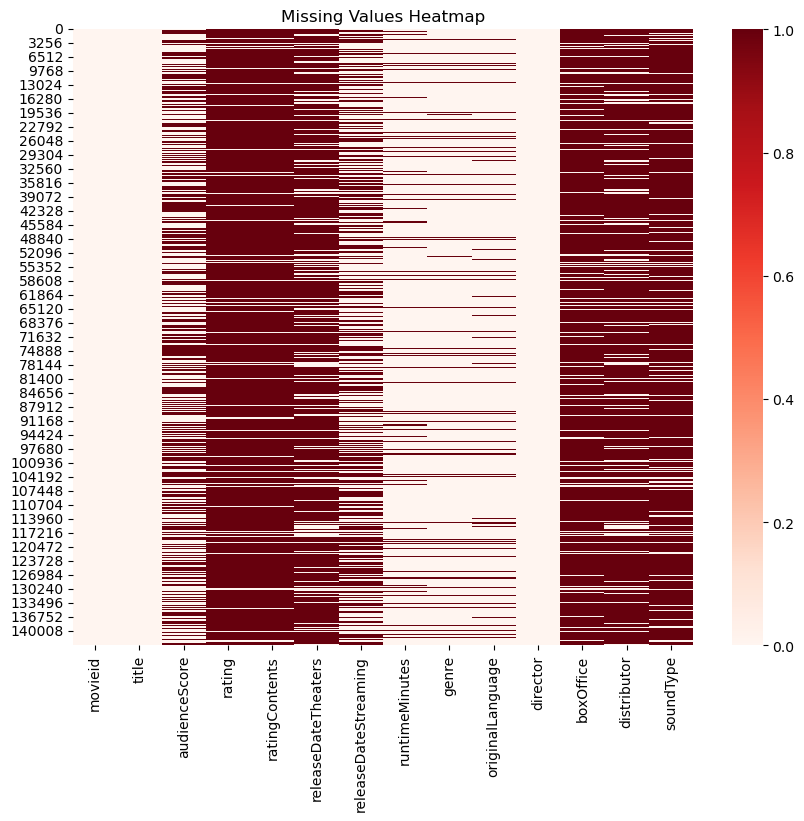

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'movies' is your DataFrame
plt.figure(figsize=(10, 8))
sns.heatmap(movies.isna(), cmap='Reds')
plt.title('Missing Values Heatmap')
plt.show()

**We can notice that the data contains a significant amount of null values.**

# moviesid duplicate data
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">Another thing to note, the moviesid has duplicate movieid entries. We should have only one unique entry for a particular movieid.

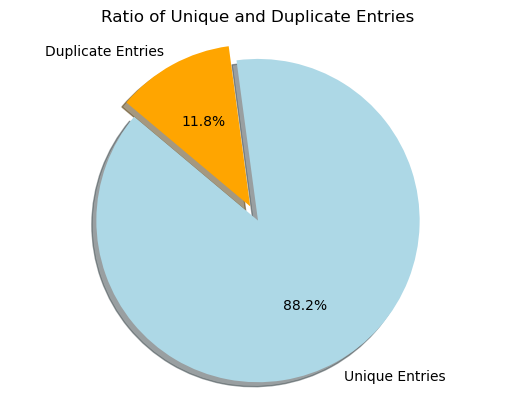

In [13]:
# Calculate the number of unique movieid entries
num_unique_movieid = len(movies['movieid'].unique())

# Calculate the number of duplicate entries
num_duplicate_entries = movies.shape[0] - num_unique_movieid

# Create a pie chart
labels = ['Unique Entries', 'Duplicate Entries']
sizes = [num_unique_movieid, num_duplicate_entries]
colors = ['lightblue', 'orange']
explode = (0.1, 0)  # explode the 1st slice (Unique Entries)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Ratio of Unique and Duplicate Entries')
plt.show()


In [14]:
# removing all the duplicates in 'movieid' 
movies_unique = movies.drop_duplicates(subset='movieid', keep='first')
movies = movies_unique

# Handling Other Columns


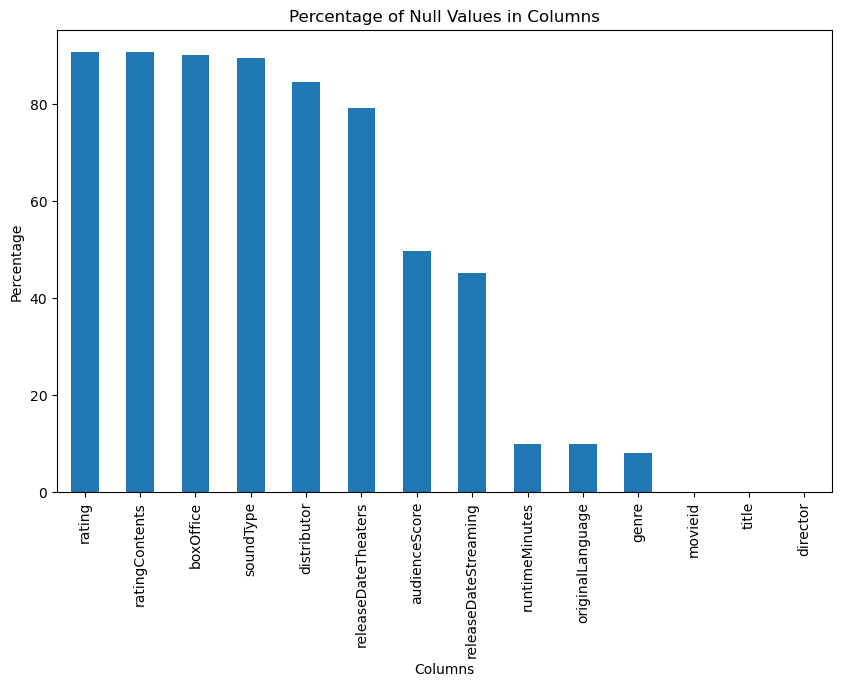

In [15]:
import pandas as pd

# Assuming 'movies' is your DataFrame
null_percent = (movies.isnull().sum() / len(movies)) * 100
null_percent = null_percent.sort_values(ascending=False)

# Create a bar plot
null_percent.plot(kind='bar', figsize=(10, 6))
plt.title('Percentage of Null Values in Columns')
plt.ylabel('Percentage')
plt.xlabel('Columns')
plt.show()

Column Retained

* audienceScore(70010) : This can give us a meaningful information about the movie. Audience Score is a part of review. Null values are less compared to other columns

Dropped Columns:

* rating
* ratingContents
* releaseDateTheaters
* releaseDateStreaming
* runtimeMinutes
* genre
* originalLanguage
* director
* boxOffice
* distributor
* soundType

However, few columns like director can be useful, for early model building we are skipping them.

In [16]:
#filling the null values in audience_score column
audience_score_mean = movies['audienceScore'].mean()
movies['audienceScore'].fillna(audience_score_mean, inplace=True)

In [17]:
movies.drop(columns=['title','releaseDateStreaming','rating','runtimeMinutes','genre','ratingContents','releaseDateTheaters','boxOffice',
                     'originalLanguage','distributor','soundType'], inplace=True)

# Merging Train & Test Data with Movies Data

In [18]:
# Join movies and train DataFrames on the "movieid" column
combined_movies_data = pd.merge(train, movies, on="movieid")

In [19]:
# Join movies and test DataFrames on the "movieid" column
combined_movies_test = pd.merge(test, movies, on="movieid")
combined_movies_test.head(2)

,movieid,reviewerName,isTopCritic,reviewText,audienceScore,director
0,legend_marty_mcfly_oracle,John Kim,False,Green slowly cranks up the dread with style an...,57.0,Sara Barnett
1,legend_marty_mcfly_oracle,Kathleen Poole,False,Considering this is the 13th Halloween movie&#...,57.0,Sara Barnett


In [20]:
combined_movies_test.shape

(55315, 6)

In [21]:
combined_movies_data.shape

(162758, 7)

In [22]:
combined_movies_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162758 entries, 0 to 162757
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   movieid             162758 non-null  object 
 1   reviewerName        162758 non-null  object 
 2   isFrequentReviewer  162758 non-null  bool   
 3   reviewText          162758 non-null  object 
 4   sentiment           162758 non-null  object 
 5   audienceScore       162758 non-null  float64
 6   director            162758 non-null  object 
dtypes: bool(1), float64(1), object(5)
memory usage: 8.8+ MB


# isTopCritic & isFrequentReviewer
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">Train contains isFrequentReviewer & Test contains isTopCritic column.
We should always keep same columns for both train and test data. However, the above both columns have almost same meaning in the sense that both depict that the user gives a lot of reviews and can have varying opinions but quality one.</p></div>

In [23]:
#combined_movies_data.drop(columns='isFrequentReviewer', inplace=True)
#combined_movies_test.drop(columns='isTopCritic', inplace=True)

# Feature Extraction

Let's try to extract a feature out of reviewText: reviewLength

In [24]:
combined_movies_data['reviewLength'] = combined_movies_data['reviewText'].apply(lambda x: len(x.split()))
combined_movies_test['reviewLength'] = combined_movies_test['reviewText'].apply(lambda x: len(x.split()))

Length of shortest text =  0
Length of Longest text =  54


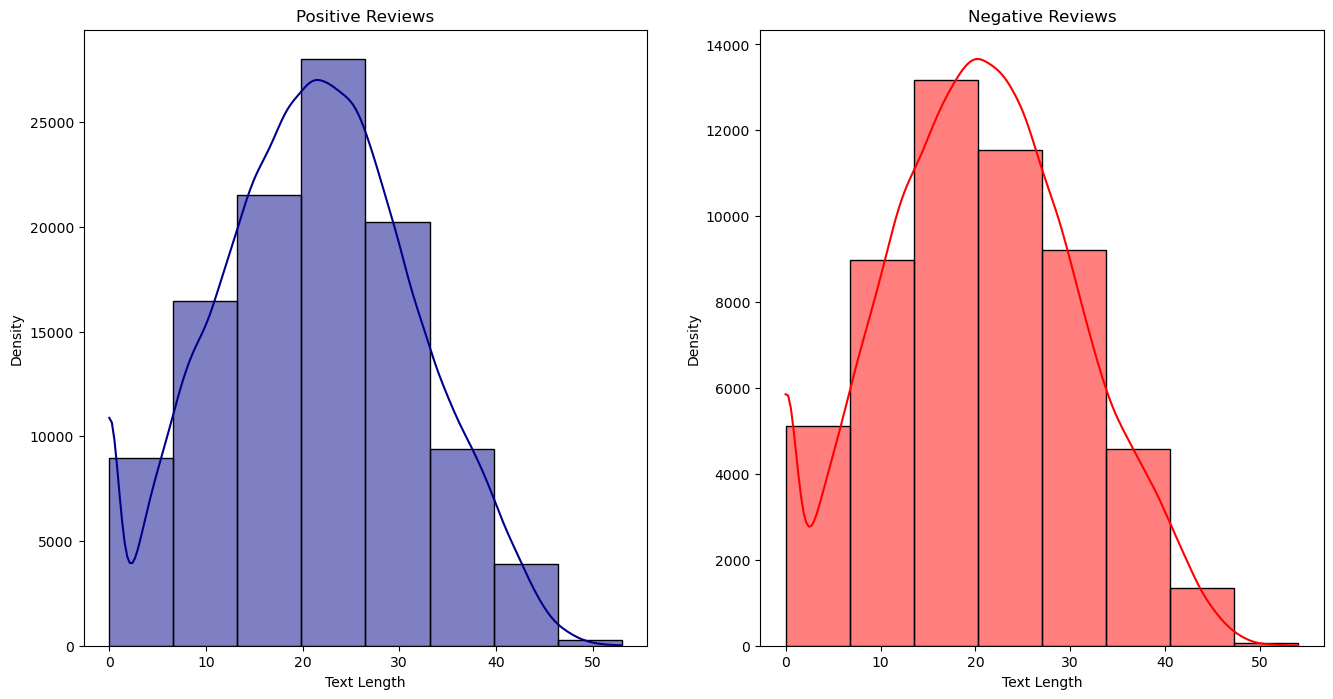

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Length of shortest text = ", min(combined_movies_data['reviewLength']))
print("Length of Longest text = ", max(combined_movies_data['reviewLength']))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# For Positive Review
sns.histplot(data=combined_movies_data[combined_movies_data['sentiment'] == 'POSITIVE'], x='reviewLength', bins=int(200/25),
             color='darkblue', ax=ax1, kde=True)
ax1.set_title('Positive Reviews')
ax1.set_xlabel('Text Length')
ax1.set_ylabel('Density')

# For Negative Review
sns.histplot(data=combined_movies_data[combined_movies_data['sentiment'] == 'NEGATIVE'], x='reviewLength', bins=int(200/25),
             color='red', ax=ax2, kde=True)
ax2.set_title('Negative Reviews')
ax2.set_xlabel('Text Length')
ax2.set_ylabel('Density')

plt.show()


# They are similar

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
Both 1 & 0 classififed labels are distributed in an almost similar manner. Short, medium & Long reviews all are equally filled with both reviews. However postive labels have a higher peak around text length 150
</p>
</div>


# Encoding Data

Model building requires only numerical data. We need to convert categorical data into numerical data using encoding techniques.

In [26]:
#converting categorical variables into numerical format
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
combined_movies_data["sentiment"] = label_encoder.fit_transform(combined_movies_data["sentiment"])
combined_movies_data["director"] = label_encoder.fit_transform(combined_movies_data["director"])
combined_movies_test["director"] = label_encoder.fit_transform(combined_movies_test["director"])


In [27]:
combined_movies_data

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment,audienceScore,director,reviewLength
0,marvelous_pirate,Benjamin Henry,False,Henry Selick’s first movie since 2009’s Corali...,1,65.0,723,11
1,marvelous_pirate,Sharon Foster,False,&#91;T&#93;he haphazard way this story is asse...,0,65.0,723,26
2,marvelous_pirate,Melinda Dunn,False,The stop-motion artistry of Wendell &amp; Wild...,1,65.0,723,17
3,marvelous_pirate,Mr. Wayne Smith,False,Wendell &amp; Wild is narratively overstuffed ...,0,65.0,723,21
4,marvelous_pirate,Connor Nelson,False,For being about the Netherworlds&#44; it&#8217...,1,65.0,723,10
...,...,...,...,...,...,...,...,...
162753,frodo_baggins_norman_bates_ellen_ripley_astonish,Janice Pearson,False,The broad shape of the ending is predictable; ...,0,81.0,8072,36
162754,elegant_starlight_labyrinth_katniss_everdeen,Frank Farrell,False,A formula designed for adolescent and young ad...,1,75.0,2990,19
162755,don_vito_corleone_neo_hannibal_lecter,Juan Taylor,False,"All these years, I've kept a soft spot in my h...",0,55.0,1595,31
162756,dorothy_gale_luke_skywalker_luke_skywalker,Robert Cardenas,False,Powerful documentary about the struggle of Wes...,1,75.0,3785,27


In [28]:
combined_movies_test

,movieid,reviewerName,isTopCritic,reviewText,audienceScore,director,reviewLength
0,legend_marty_mcfly_oracle,John Kim,False,Green slowly cranks up the dread with style an...,57.000000,8068,31
1,legend_marty_mcfly_oracle,Kathleen Poole,False,Considering this is the 13th Halloween movie&#...,57.000000,8068,20
2,legend_marty_mcfly_oracle,Kenneth Lamb,False,Halloween Ends is by no means the worst horror...,57.000000,8068,31
3,legend_marty_mcfly_oracle,Brittany Lane,False,A concluding chapter that shares more DNA with...,57.000000,8068,30
4,legend_marty_mcfly_oracle,Yolanda Thomas,False,For a film called Halloween Ends&#44; let&#821...,57.000000,8068,13
...,...,...,...,...,...,...,...
55310,vivid_hannibal_lecter,Brandon Gamble,False,I love Siegel's sly paralleling of Ali's fight...,85.000000,6883,16
55311,rocky_balboa_darth_vader_wolverine_james_t._kirk,Traci Roberts,True,This is a failure that deserves credit mainly ...,51.000000,5401,24
55312,black_widow_frodo_baggins_tony_montana_mythical,Kari Wolf,False,John F. Donovan may revisit a lot of familiar ...,53.000000,9416,23
55313,glorious_wondrous_the_terminator,Gwendolyn Guerra,False,"An unpretentious, autobiographical movie explo...",30.000000,8081,14


# X & Y split

Lets split our target variable from the data

In [29]:
# Prepare the data
y = combined_movies_data["sentiment"]

In [30]:
y.value_counts()

1    108761
0     53997
Name: sentiment, dtype: int64

In [31]:
X = combined_movies_data.drop(columns='sentiment')

In [32]:
X['reviewText'] = X['reviewText'].astype(str)
combined_movies_test['reviewText'] = combined_movies_test['reviewText'].astype(str)

# Scaling Data

Columns or features have different scales. While preparing data, we should normalize and scale the data in such a manner that every column has the same scale.

In [33]:
#data scaling
from sklearn.preprocessing import StandardScaler

# Extract numerical columns
numerical_columns = combined_movies_data.select_dtypes(include=['int64', 'float64']).columns
#we dont want to scale sentiment
numerical_columns = numerical_columns[numerical_columns!='sentiment']
# Initialize the StandardScaler
scaler = StandardScaler()

# Apply data scaling to numerical columns
combined_movies_data[numerical_columns] = scaler.fit_transform(combined_movies_data[numerical_columns])

numerical_columns = combined_movies_test.select_dtypes(include=['int64', 'float64']).columns


combined_movies_test[numerical_columns] = scaler.fit_transform(combined_movies_test[numerical_columns])


In [34]:
X.shape

(162758, 7)

In [35]:
y.shape

(162758,)

In [36]:
combined_movies_test.head()

,movieid,reviewerName,isTopCritic,reviewText,audienceScore,director,reviewLength
0,legend_marty_mcfly_oracle,John Kim,False,Green slowly cranks up the dread with style an...,-0.371043,1.193627,0.978385
1,legend_marty_mcfly_oracle,Kathleen Poole,False,Considering this is the 13th Halloween movie&#...,-0.371043,1.193627,-0.079865
2,legend_marty_mcfly_oracle,Kenneth Lamb,False,Halloween Ends is by no means the worst horror...,-0.371043,1.193627,0.978385
3,legend_marty_mcfly_oracle,Brittany Lane,False,A concluding chapter that shares more DNA with...,-0.371043,1.193627,0.882180
4,legend_marty_mcfly_oracle,Yolanda Thomas,False,For a film called Halloween Ends&#44; let&#821...,-0.371043,1.193627,-0.753296


# Handling reviewText Column
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
1. Cleaning: We want to clean the data.<br>
2. Remove Stopwords: Stopwords like 'I', 'am', 'the' are neutral and have no contribution in identifying the sentiment of text.<br>
3. Tokenization: Breaking a sentence or phrase into a collection of token. (I know you. -> I,Know,you,.)<br>
4. Stemming: We want to keep the base form of word while removing others. (go, going, gone = go)<br>
5. TFIDF Vectorization<br>

In [37]:
import html
X['reviewText'] = html.unescape(X['reviewText'])
combined_movies_test['reviewText'] = html.unescape(combined_movies_test['reviewText'])

# Cleaning Text

In [38]:
import regex as re
import string 
def preprocess_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower() #lowercase text
    text = re.sub('\[.*?\]', '', text) #replacing [text] with text
    text = re.sub('https?://\S+|www\.\S+', '', text) #removing website links
    text = re.sub('<.*?>+', '', text) #remove any html tag
    text = re.sub(r'&\w+;', '', text) #html symbolic encoding like &nbsp;
    text = re.sub('\n', '', text) #removing newline text
    text = re.sub('\w*\d\w*', '', text) #removing numbers from text
    text = re.sub(r'[^a-zA-Z0-9\s]','',text)
    return text

# Apply preprocessing to the 'reviewText' column
X['reviewText'] = X['reviewText'].apply(preprocess_text)
combined_movies_test['reviewText'] = combined_movies_test['reviewText'].apply(preprocess_text)

In [39]:
X['reviewText'].head()

0    henry selicks first movie since s coraline his...
1    the haphazard way this story is assembled make...
2    the stopmotion artistry of wendell  wild is ex...
3    wendell  wild is narratively overstuffed past ...
4    for being about the netherworlds its very warm...
Name: reviewText, dtype: object

# Removing StopWords

In [40]:
from collections import Counter
X['temp_list'] = X['reviewText'].apply(lambda x:str(x).split())
top = Counter([item for sublist in X['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,the,177835
1,a,125018
2,and,108176
3,of,103173
4,to,72320
5,is,64179
6,in,47348
7,its,42694
8,that,40977
9,it,40371


In [41]:
# Stopwords analysis of text feature
topStop = pd.DataFrame(top.most_common(100))
stoplist  = [item for item in topStop[0]]
stoplist2 = ['the','i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself','to', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who','will', 'whom', 'this', 'that','thats', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having','in', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'and','as', 's', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so','be','than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'should', "should've", 'now','a', 'd', 'll', 'm', 'o', 're', \
            've', 'y','for','get','see','two','also','made','every']
stopwords = stoplist + stoplist2
stopwords = list(set(stopwords))

In [42]:
def remove_stopword(x):
    return [y for y in x.split() if y not in stopwords]

X['reviewText'] = X['reviewText'].apply(lambda x: ' '.join(remove_stopword(str(x))))
combined_movies_test['reviewText'] = combined_movies_test['reviewText'].apply(lambda x: ' '.join(remove_stopword(str(x))))

In [43]:
from collections import Counter
X['temp_list'] = X['reviewText'].apply(lambda x:str(x).split())
top = Counter([item for sublist in X['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(40))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,new,3468
1,performances,3327
2,something,3302
3,could,3198
4,feels,3155
5,first,3128
6,isnt,3078
7,many,3060
8,would,3029
9,better,2983


# Tokenization & Stemming

In [44]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,TfidfTransformer,ENGLISH_STOP_WORDS

def text_tokenize(text):
    tokens = re.findall(r'\b\w+\b', text)
    return tokens

In [45]:
X.drop(columns='temp_list', inplace=True)

In [46]:
def basic_stemmer(text):
    # Define stemming patterns
    stemming_patterns = [
        (r'ing\b', ''),  # Remove 'ing' suffix
        (r's\b', ''),    # Remove 's' plural
        (r'ed\b', ''),   # Remove 'ed' past tense
    ]
    
    # Apply stemming patterns to text
    for pattern, replacement in stemming_patterns:
        text = re.sub(pattern, replacement, text)
    return text

# Apply stemming to the text data
X['reviewText'] = [basic_stemmer(text) for text in X['reviewText']]
combined_movies_test['reviewText'] = [basic_stemmer(text) for text in combined_movies_test['reviewText']]

In [47]:
#X['reviewText'] = X['reviewText'].apply(text_tokenize)
#combined_movies_test['reviewText'] = combined_movies_test['reviewText'].apply(text_tokenize)
#combined_movies_test['reviewText'] = combined_movies_test['reviewText'].apply(stopwords)
#combined_movies_test['reviewText'] = combined_movies_test['reviewText'].apply(lambda x: ''.join(x))
#X['reviewText'] = X['reviewText'].apply(lambda x: ''.join(x))

In [48]:
X.head()

,movieid,reviewerName,isFrequentReviewer,reviewText,audienceScore,director,reviewLength
0,marvelous_pirate,Benjamin Henry,False,henry selick first since coraline fifth stopmo...,65.0,723,11
1,marvelous_pirate,Sharon Foster,False,haphazard assembl seem filmmaker concern detai...,65.0,723,26
2,marvelous_pirate,Melinda Dunn,False,stopmotion artistry wendell wild exquisite lea...,65.0,723,17
3,marvelous_pirate,Mr. Wayne Smith,False,wendell wild narratively overstuff past limit ...,65.0,723,21
4,marvelous_pirate,Connor Nelson,False,netherworld warm invit,65.0,723,10


In [49]:
#from sklearn.utils import resample
#from sklearn.utils import shuffle
#X = pd.DataFrame(
#{'reviewText': X['reviewText'],
#'sentiment': y
#})
#X = X['reviewText']
#xp = X[X['sentiment'] == 1]
#xn = X[X['sentiment'] == 0]

#X = pd.concat([xp.sample(frac=0.8,random_state=200),
#         xn.sample(frac=0.8,random_state=200)])
#X = shuffle(X)
#
#Xn = resample(xn, 
#     replace=True,     # sample with replacement
#    n_samples= xp.shape[0],    # to match majority class
#    random_state=123) # reproducible results
 
## Combine majority class with upsampled minority class
#X = pd.concat([xp, Xn])

In [50]:
#X['sentiment'].value_counts()

In [51]:
#y = X['sentiment']
#X = X.drop(columns='sentiment')

In [52]:
X

,movieid,reviewerName,isFrequentReviewer,reviewText,audienceScore,director,reviewLength
0,marvelous_pirate,Benjamin Henry,False,henry selick first since coraline fifth stopmo...,65.0,723,11
1,marvelous_pirate,Sharon Foster,False,haphazard assembl seem filmmaker concern detai...,65.0,723,26
2,marvelous_pirate,Melinda Dunn,False,stopmotion artistry wendell wild exquisite lea...,65.0,723,17
3,marvelous_pirate,Mr. Wayne Smith,False,wendell wild narratively overstuff past limit ...,65.0,723,21
4,marvelous_pirate,Connor Nelson,False,netherworld warm invit,65.0,723,10
...,...,...,...,...,...,...,...
162753,frodo_baggins_norman_bates_ellen_ripley_astonish,Janice Pearson,False,broad shape end predictable could probably wri...,81.0,8072,36
162754,elegant_starlight_labyrinth_katniss_everdeen,Frank Farrell,False,formula design adolescent young adult spectato...,75.0,2990,19
162755,don_vito_corleone_neo_hannibal_lecter,Juan Taylor,False,year ive kept soft spot heart clumsy glory cou...,55.0,1595,31
162756,dorothy_gale_luke_skywalker_luke_skywalker,Robert Cardenas,False,powerful documentary struggle west virginian a...,75.0,3785,27


In [53]:
X = X.drop(columns=['movieid','reviewerName','reviewLength','director'])

In [54]:
X.head()

,isFrequentReviewer,reviewText,audienceScore
0,False,henry selick first since coraline fifth stopmo...,65.0
1,False,haphazard assembl seem filmmaker concern detai...,65.0
2,False,stopmotion artistry wendell wild exquisite lea...,65.0
3,False,wendell wild narratively overstuff past limit ...,65.0
4,False,netherworld warm invit,65.0


# TFIDF Vectorization

In [55]:
from sklearn.pipeline import Pipeline
tfidf_vectorizer = TfidfVectorizer(norm="l2", smooth_idf=True)

preprocessing_pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer)  # Scale the TF-IDF features
])

X = preprocessing_pipeline.fit_transform(X['reviewText'])
test_p = preprocessing_pipeline.transform(combined_movies_test['reviewText'])

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">For now we are ignoring the other columns in train and test data and only considering reviewText column. We can also consider other columns by transforming them with tfidf vectorization.

In [56]:
X

<162758x70888 sparse matrix of type '<class 'numpy.float64'>'
	with 1667143 stored elements in Compressed Sparse Row format>

In [57]:
from sklearn.compose import ColumnTransformer
transformer = ColumnTransformer([("id", TfidfVectorizer(),'movieid'),
                                 ("reviewtf", TfidfVectorizer(ngram_range=(1,2),max_features=5000), 'reviewText'),
                                 ("rNtf", TfidfVectorizer(), 'reviewerName')],
                               remainder='passthrough',n_jobs=-1, verbose=True)

In [58]:
#X = transformer.fit_transform(X)
#test_p = transformer.transform(combined_movies_test)
#X.shape

# Dimensionality Reduction using SVD

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">We should have a balanced number of features for training a model. With increased features, model tends to overfit. With fairly low features, model tends to underfit.

Here after TFIDF we want to reduce the dimensionality of the data. This also reduces computational cost.</p></div>

In [59]:
#linear dimensionality reduction
from sklearn.decomposition import TruncatedSVD

# Create an SVD instance
#svd = TruncatedSVD(n_components=500)
#X = svd.fit_transform(X)
#test_p = svd.transform(test_p)

In [60]:
#non_text_features = np.array([combined_movies_data['reviewLength'],combined_movies_data['director'],combined_movies_data['audienceScore']]).T  # Transpose to match dimensions

# Concatenate the TF-IDF matrix and non-text feature matrix horizontally
#X = np.hstack((X, non_text_features))

In [61]:
#non_text_features = np.array([combined_movies_test['reviewLength'],combined_movies_test['director'],combined_movies_test['audienceScore']]).T  # Transpose to match dimensions

# Concatenate the TF-IDF matrix and non-text feature matrix horizontally
#test_p = np.hstack((test_p, non_text_features))

# Train Test Split

In [62]:
# Split the data into training and validation sets
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

<span style="color:	#5642C5; font-size:30px">**<u>building baseline model</u>**</span>

In [63]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,VotingClassifier

The beow function allows us to make prediction on train and test dataset by taking a model as input

In [64]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(confusion_matrix, class_names):
    fig, ax = plt.subplots(figsize=(8, 6))
    im = ax.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    
    ax.figure.colorbar(im, ax=ax)
    
    ax.set(xticks=np.arange(confusion_matrix.shape[1]),
           yticks=np.arange(confusion_matrix.shape[0]),
           xticklabels=class_names, yticklabels=class_names,
           title='Confusion Matrix',
           ylabel='True label',
           xlabel='Predicted label')

    plt.show()

def makePredictions(model):
    predictions = model.predict(X_train)
    print(type(model).__name__,' Train Prediction Score')
    print(classification_report(y_train,predictions))
    confusion = confusion_matrix(y_train, predictions)
    class_names = ["Class 0", "Class 1"]  # Replace with your actual class names
    plot_confusion_matrix(confusion, class_names)
    predictions = model.predict(X_test)
    print(type(model).__name__,' Test Prediction Score')
    print(classification_report(y_test,predictions))
    confusion = confusion_matrix(y_test, predictions)
    class_names = ["Class 0", "Class 1"]  # Replace with your actual class names
    plot_confusion_matrix(confusion, class_names)

In [65]:
lr = LogisticRegression(solver="saga", fit_intercept=True, C=2, penalty="l2",tol=1e-05,max_iter=2000)

lr.fit(X_train,y_train)

LogisticRegression(C=2, max_iter=2000, solver='saga', tol=1e-05)

We will use the below metrics to evaluate our model:

![](https://www.tutorialexample.com/wp-content/uploads/2022/01/how-to-compute-accuracy-precision-recall-and-f1-score-in-machine-learning.png)



LogisticRegression  Train Prediction Score
              precision    recall  f1-score   support

           0       0.84      0.66      0.74     43197
           1       0.85      0.94      0.89     87009

    accuracy                           0.85    130206
   macro avg       0.85      0.80      0.82    130206
weighted avg       0.85      0.85      0.84    130206



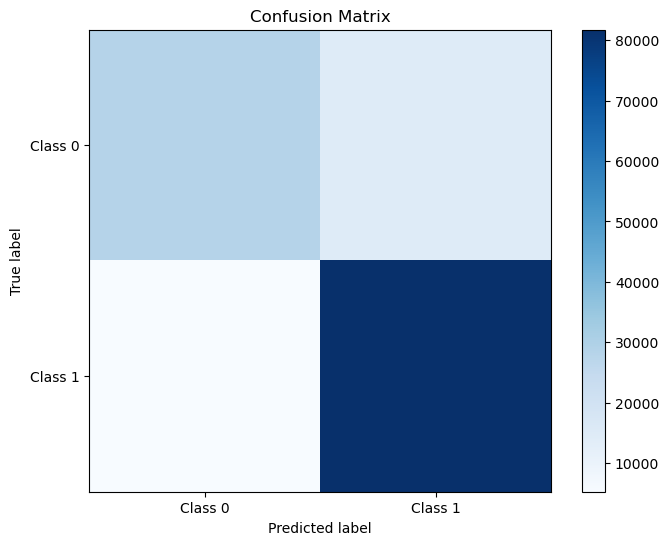

LogisticRegression  Test Prediction Score
              precision    recall  f1-score   support

           0       0.74      0.55      0.63     10800
           1       0.80      0.90      0.85     21752

    accuracy                           0.79     32552
   macro avg       0.77      0.73      0.74     32552
weighted avg       0.78      0.79      0.78     32552



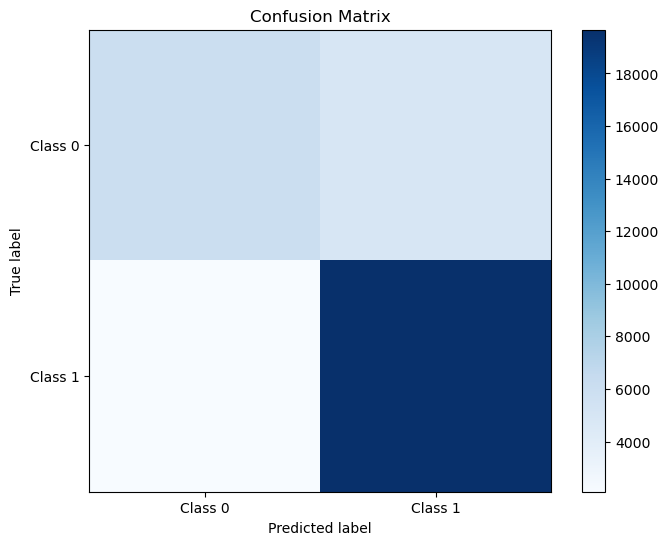

In [66]:
makePredictions(lr)

In [67]:
from sklearn.model_selection import cross_val_score
#scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='accuracy')
#print(scores)

<span style="color:	#5642C5; font-size:30px">**<u>Apply KNN and SVM models</u>**</span>

In [68]:
# Create the KNN model
knn_model = KNeighborsClassifier(n_neighbors=3)

In [69]:
# Train the KNN model with the binary target variable
#knn_model.fit(X_train, y_train)

In [70]:
#makePredictions(knn_model)

In [71]:
#knn_y_pred = knn_model.predict(X_test)

In [72]:
#knn_accuracy = accuracy_score(y_test, knn_y_pred)
#knn_classification_report = classification_report(y_test, knn_y_pred)

# Print the results
#print("KNN Accuracy:", knn_accuracy)
#print("KNN Classification Report:")
#print(knn_classification_report)

In [73]:
#from sklearn.svm import SVC

In [74]:
# Create the SVM model with max_iter set to a specific value (e.g., 1000)
#svm_model = SVC(kernel='linear', C=1, max_iter=1000)
# Train the SVM model with the binary target variable
#svm_model.fit(X_train, y_train)

In [75]:
# Make predictions using the SVM model
#svm_y_pred = svm_model.predict(X_test)

In [76]:
#svm_accuracy = accuracy_score(y_test, svm_y_pred)
#svm_classification_report = classification_report(y_test, svm_y_pred)

#print("\nSVM Accuracy:", svm_accuracy)
#print("SVM Classification Report:")
#print(svm_classification_report)

<span style="color:	#5642C5; font-size:30px">**<u>CART,Bagging and Boosting</u>**</span>

In [77]:
# Create the CART model (Decision Tree)
#cart_model = DecisionTreeClassifier()

In [78]:
# Train the CART model
#cart_model.fit(X_train, y_train)

In [79]:
#makePredictions(cart_model)

In [80]:
# Make predictions using the CART model
#cart_y_pred = cart_model.predict(X_test)

In [81]:
# Evaluate the CART model
#cart_accuracy = accuracy_score(y_test, cart_y_pred)
#cart_classification_report = classification_report(y_test, cart_y_pred)
#print("CART Accuracy:", cart_accuracy)
#print("CART Classification Report:")
#print(cart_classification_report)

In [82]:
# Create the Bagging model (Random Forest)
#bagging_model = RandomForestClassifier(n_estimators=20)

In [83]:
# Train the Bagging model
#bagging_model.fit(X_train, y_train)

In [84]:
#makePredictions(bagging_model)

In [85]:
# Evaluate the Bagging model
#bagging_accuracy = accuracy_score(y_test, bagging_y_pred)
#bagging_classification_report = classification_report(y_test, bagging_y_pred)

#print("\nBagging Accuracy:", bagging_accuracy)
#print("Bagging Classification Report:")
#print(bagging_classification_report)

In [86]:
#gbc = GradientBoostingClassifier()
#gbc.fit(X_train,y_train)
#makePredictions(gbc)

In [87]:
# Make predictions on the test data
#y_pred = gbc.predict(X_test)

# Initialize an empty list to store misclassified entry indices
#misclassified_indices = []
# Iterate through the predictions and true labels to identify misclassified entries
#for i in range(len(y_test)):
#    if y_pred[i] != y_test[i]:
#        misclassified_indices.append(i)
        
# Limit to the first 10 misclassified entries
#first_10_misclassified_indices = misclassified_indices[:10]

# Extract the corresponding text entries from your dataset
#misclassified_texts = [X[idx] for idx in first_10_misclassified_indices]

# Print or analyze the misclassified text entries
#for i, text in enumerate(misclassified_texts):
    #print(f"Misclassified Entry {i + 1}:\n{text}\n")

# Hyperparamter Tuning using GridSearchCV

In [88]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid
#param_grid = {
#    'C': [0.1, 1, 10],
#    'penalty': ['l1', 'l2'],
#    'loss': ['hinge', 'squared_hinge']
#}

#Create GBC model
#lsvc = LinearSVC()

# create GridSearchCV object
#grid_search = GridSearchCV(lsvc, param_grid, scoring='accuracy', cv=5)

# Fit the grid search to your data
#grid_search.fit(X_train,y_train)
#lsvc = grid_search.best_estimator_
# Print the best hyperparameters and their corresponding score
#print("Best Hyperparameters:", grid_search.best_params_)
#print("Best Score:", grid_search.best_score_)

After GridSearch, we obtained the below parameters to perform the best

In [89]:
lsvc = LinearSVC(C=10, dual=False, max_iter=2000, penalty='l2')

In [90]:
#C=1, dual=False, max_iter=1000, penalty='l1', tol=0.0001
best_svm_model = lsvc
best_svm_model.fit(X_train,y_train)

LinearSVC(C=10, dual=False, max_iter=2000)

LinearSVC  Train Prediction Score
              precision    recall  f1-score   support

           0       0.90      0.82      0.86     43197
           1       0.91      0.96      0.93     87009

    accuracy                           0.91    130206
   macro avg       0.91      0.89      0.90    130206
weighted avg       0.91      0.91      0.91    130206



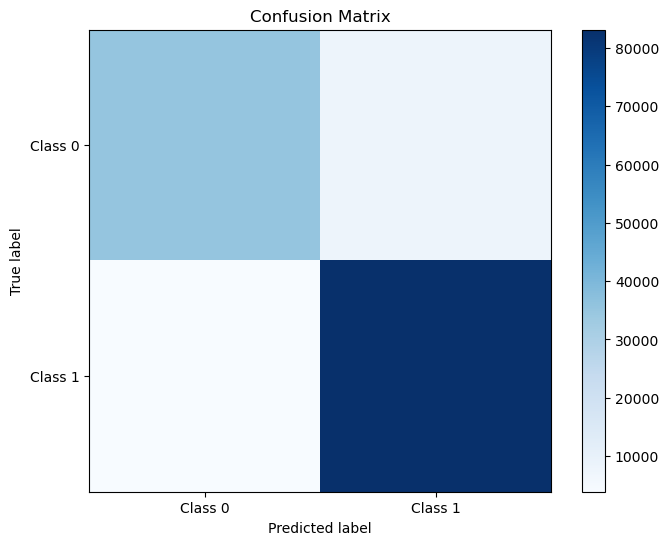

LinearSVC  Test Prediction Score
              precision    recall  f1-score   support

           0       0.66      0.57      0.61     10800
           1       0.80      0.85      0.82     21752

    accuracy                           0.76     32552
   macro avg       0.73      0.71      0.72     32552
weighted avg       0.75      0.76      0.75     32552



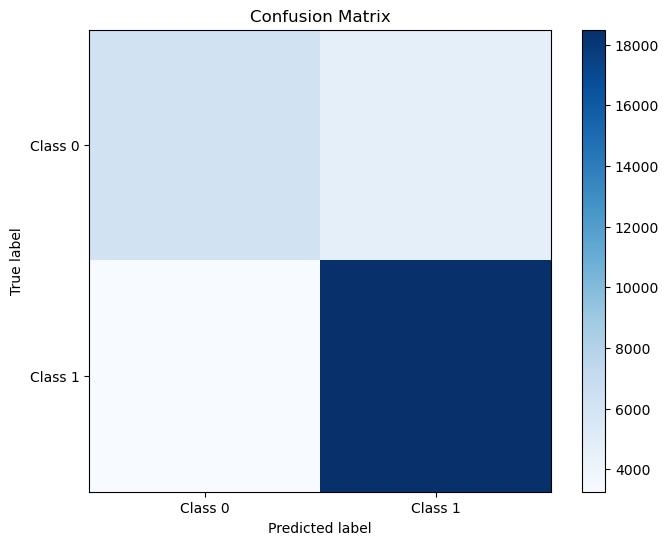

In [91]:
makePredictions(best_svm_model)

<span style="color:	#5642C5; font-size:30px">**<u> Final Model's Prediction </u>**</span>

In [92]:
best_model = lr

In [93]:
finpred = best_model.predict(test_p)
#finpred = main_pipeline.predict(combined_movies_test['reviewText'])
def convert_results(result):
    return "NEGATIVE" if result == 0 else "POSITIVE"

#finresult = [convert_results(result) for result in finpred]
finresult = [convert_results(result) for result in finpred]

In [94]:
sample = pd.read_csv("/kaggle/input/sentiment-prediction-on-movie-reviews/sample.csv")
sample.head()

,id,sentiment
0,0,NEGATIVE
1,1,NEGATIVE
2,2,NEGATIVE
3,3,NEGATIVE
4,4,NEGATIVE


In [95]:
sid = sample.id

In [96]:
df = pd.DataFrame({"id" : sid,"sentiment": finresult})
df.to_csv('submission.csv', index =False)